In [1]:
#Import Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [ ]:
#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States') ].copy()

#Drop NaN values from the column for plotting
df_DA_US =  df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)


In [ ]:
# Vamos buscar as profissoes mais demandadas e quais os salarios medianos de cada uma delas
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

# Vamos criar os percentuais
df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/(len(df_DA_US))*100

skill_percent = 5

df_DA_skills_high_demand=df_DA_skills[df_DA_skills['skill_percent'] > skill_percent] 

df_DA_skills_high_demand

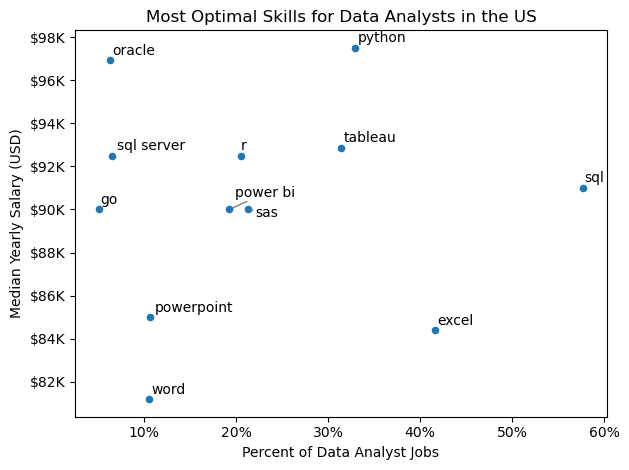

In [7]:
from adjustText import adjust_text
import matplotlib.ticker as mticker

df_DA_skills_high_demand.plot(kind='scatter', x = 'skill_percent', y = 'median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops = dict(arrowstyle = "->",color = 'gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))   # FuncFormatter

# Formatting x-axis with commas
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}%'))   # FuncFormatter

plt.
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()

In [ ]:
# Separar os skills por tipo. No df estah em um coluna chamada job_type_skills que eh um dictionary
df_technology = df['job_type_skills'].copy()

# Remove duplicates
df_technology = df_technology.drop_duplicates()

# Remove NaN values
df_technology = df_technology.dropna()

# Combine all dictionaries into one
tech_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)            # converting string to dictionary
    for key, value in row_dict.items():            
        if key in tech_dict:                    # if key already exists in tech_dict:
            tech_dict[key] += value                 # add value to existing value 
        else:                                   # if key does not exist in tech_dict:
            tech_dict[key] = value                  # add key and value

# remove duplicates by converting values to set then back to list
for key, value in tech_dict.items():            
    tech_dict[key] = list(set(value))

tech_dict

In [17]:
df_technology = pd.DataFrame(list(tech_dict.items()),columns = ['technology','skills'])
df_technology = df_technology.explode('skills')
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

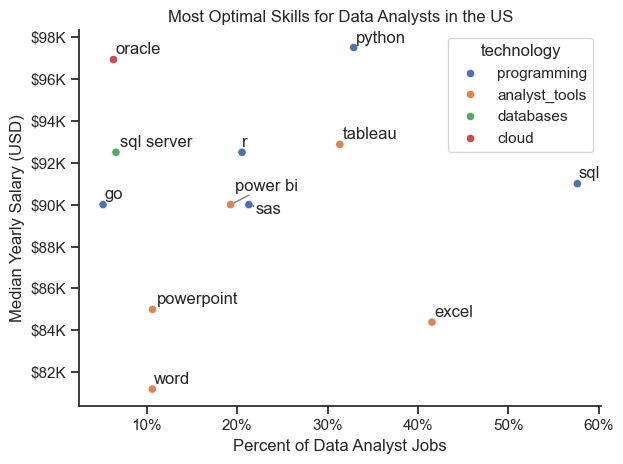

In [22]:
from adjustText import adjust_text

sns.scatterplot(
    data = df_plot,
    x = 'skill_percent', 
    y = 'median_salary',
    hue = 'technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops = dict(arrowstyle = "->",color = 'gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))   # FuncFormatter

# Formatting x-axis with commas
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}%'))   # FuncFormatter

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()